In [1]:
import os
import pandas as pd
import PyPDF2
from utils import *

# 1 PDF to CSV plus sentence filtering

First, extract the text from the pdf file into a CSV file. I am saving the data in pandas dataframe, where each row is going to represent a sentence in the text. For each sentence I am storing the text along with the chapter number, page in the chapter, and the length of the sentence.

In [2]:
pdfFileObj = open('amt_airframe_hb_vol_1.pdf', 'rb')  
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)   

After wrangling with the data that I extracted from the text I saw that most of the pages return the chapter and the page number at the very begining of the text, so I decided to use it. See below:

In [7]:
pdfReader.getPage(40).extractText()

'1-15Lower cap memberUpper cap memberDiagonal tubeVertical tubeLower spar capUpper spar capRib attach angleStiffenerCapsSine wave webLower spar capUpper spar capRivetsSpliceLower spar webUpper spar webFigure 1-27. A truss wing spar.Figure 1-28. A plate web wing spar with vertical stiffeners. Figure 1-30. A fail-safe spar with a riveted spar web. Figure 1-29. A sine wave wing spar can be made from aluminum or composite materials. type of spar breaks, the other section can still carry the load. \nThis is the fail-safe feature.As a rule, a wing has two spars. One spar is usually located \nnear the front of the wing, and the other about two-thirds of \n\nthe distance toward the wing™s trailing edge. Regardless of \n\ntype, the spar is the most important part of the wing. When \nother structural members of the wing are placed under load, \n\nmost of the resulting stress is passed on to the wing spar.False spars are commonly used in wing design. They are \nlongitudinal members like spars but

Extracting the text from each page and parsing the chapter number and the page number. See utils.py functions for this step

In [ ]:
def split_page_in_sentences(page):
    '''
    Split page text into sentences, deletes empty items in list
    '''
    return [sentence.strip() for sentence in page.split('.') if sentence!='']


In [ ]:
def parse_chapter_page(line):
    '''
    Parse the chapter and page in the chapter from the first sentence of the page
    '''
    pattern = '[0-9]'
    result = re.match(pattern,line[0])

    if result:
        chapter = line[0]
        if re.match(pattern,line[3]):
            page = line[2:4]
        else:
            page = line[2]
        return int(chapter),int(page)

    elif line[:2] == 'G-':
        chapter = line[0]
        if re.match(pattern,line[3]):
            page = line[2:4]
        else:
            page = line[2]
        return chapter,int(page)

    elif line[:2] == 'I-':
        chapter = line[0]
        if re.match(pattern,line[3]):
            page = line[2:4]
        else:
            page = line[2]
        return chapter,int(page)

    else:
        return 'Intro',None

In [9]:
data = pd.DataFrame(columns=['PDF_Page','Chapter','Chapter_Page','Text','Number of Words'])

In [10]:
for pdf_page_number in range(pdfReader.numPages): 
    print("PDF page: ",pdf_page_number)
    # convert all string content in page into a string
    page = pdfReader.getPage(pdf_page_number).extractText()
    # split the text in page into string (separator: .)
    lines_in_page = split_page_in_sentences(page)
    
    if len(lines_in_page) > 0:
        # only first item in the list is neccesary, it is where the page and chapter info are stored
        chapter, chapter_page = parse_chapter_page(lines_in_page[0])
        # add each sentence to our dataframe
        for line in lines_in_page:
            number_words = len(line.split(' '))
            row_sentence = {'PDF_Page':pdf_page_number,'Chapter':chapter,'Chapter_Page':chapter_page,
                                'Text':line,'Number of Words':number_words}
            data = data.append(row_sentence,ignore_index = True)

PDF page:  0
PDF page:  1
PDF page:  2
PDF page:  3
PDF page:  4
PDF page:  5
PDF page:  6
PDF page:  7
PDF page:  8
PDF page:  9
PDF page:  10
PDF page:  11
PDF page:  12
PDF page:  13
PDF page:  14
PDF page:  15
PDF page:  16
PDF page:  17
PDF page:  18
PDF page:  19
PDF page:  20
PDF page:  21
PDF page:  22
PDF page:  23
PDF page:  24
PDF page:  25
PDF page:  26
PDF page:  27
PDF page:  28
PDF page:  29
PDF page:  30
PDF page:  31
PDF page:  32
PDF page:  33
PDF page:  34
PDF page:  35
PDF page:  36
PDF page:  37
PDF page:  38
PDF page:  39
PDF page:  40
PDF page:  41
PDF page:  42
PDF page:  43
PDF page:  44
PDF page:  45
PDF page:  46
PDF page:  47
PDF page:  48
PDF page:  49
PDF page:  50
PDF page:  51
PDF page:  52
PDF page:  53
PDF page:  54
PDF page:  55
PDF page:  56
PDF page:  57
PDF page:  58
PDF page:  59
PDF page:  60
PDF page:  61
PDF page:  62
PDF page:  63
PDF page:  64
PDF page:  65
PDF page:  66
PDF page:  67
PDF page:  68
PDF page:  69
PDF page:  70
PDF page:  71
PD

PDF page:  554
PDF page:  555
PDF page:  556
PDF page:  557
PDF page:  558
PDF page:  559
PDF page:  560
PDF page:  561
PDF page:  562
PDF page:  563
PDF page:  564
PDF page:  565
PDF page:  566
PDF page:  567
PDF page:  568
PDF page:  569
PDF page:  570
PDF page:  571
PDF page:  572
PDF page:  573
PDF page:  574
PDF page:  575
PDF page:  576
PDF page:  577
PDF page:  578
PDF page:  579
PDF page:  580
PDF page:  581
PDF page:  582
PDF page:  583


In [20]:
data.head()

,PDF_Page,Chapter,Chapter_Page,Text,Number of Words
0,0,Intro,None,FAA-H-8083-31AFederal Aviation\nAdministration,2
1,2,Intro,None,Aviation Maintenance Technician \nHandbookŠAir...,5
2,2,Intro,None,S,1
3,2,Intro,None,Department of TransportationFEDERAL AVIATION A...,7
4,3,Intro,None,IV,1


We can start visualizing the first results, such as the total number of words and the distribution of the length of the sentences over the corpus

In [21]:
print('Total number of words: ', sum(data['Number of Words']))

Total number of words:  281988


(0, 60)

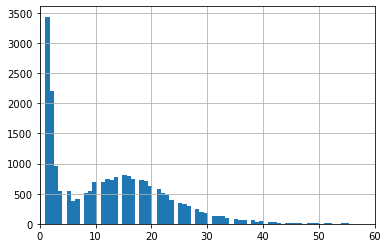

In [22]:
len_sentence_hist = data['Number of Words'].hist(bins=400)
len_sentence_hist.set_xlim((0,60))

In order to eliminate some noise, such as captions and figure descriptions (ex. 'Figure 1-28), I am going to discard those sentences whose length is less than 8 and keep the rest.

In [23]:
mask = data['Number of Words'] > 7
data_filtered = data[mask]

In [24]:
data_filtered

,PDF_Page,Chapter,Chapter_Page,Text,Number of Words
31,6,Intro,None,VIIPrefaceThe Aviation Maintenance Technician ...,26
32,6,Intro,None,It is intended that this handbook provide the ...,26
33,6,Intro,None,It is designed to aid students enrolled in a f...,26
34,6,Intro,None,Since the knowledge requirements for the airfr...,42
35,6,Intro,None,This volume contains information on airframe c...,18
...,...,...,...,...,...
21646,577,I,6,5-7Hex nut and wing nut temporary sheet fasteners,8
21904,580,I,9,4-99Repair of steel tubing aircraft structure ...,8
21967,580,I,9,2-18Sequence for painting a single-engine or l...,9
21975,580,I,9,4-88Sheet metal forming and flat pattern layou...,8


In [25]:
print('Number of words we are considering after filtering the sort sentences is %d out of %d' 
      %(sum(data_filtered['Number of Words']),sum(data['Number of Words'])))

Number of words we are considering after filtering the sort sentences is 261250 out of 281988


I also got rid of those rows that corresponds to the Intro or Appendix chapters

In [26]:
chapters_of_interest = [1,2,3,4,5,6,7,8,9]
mask = data_filtered['Chapter'].isin(chapters_of_interest)
data_filtered_2 = data_filtered[mask]

In [27]:
data_filtered_2

,PDF_Page,Chapter,Chapter_Page,Text,Number of Words
1372,26,1,1,1-1Chapter 1Aircraft StructuresA Brief History...,19
1373,26,1,1,Advances in materials and processes \nused to ...,27
1374,26,1,1,Combined with continuous powerplant \n\ndevelo...,13
1375,26,1,1,The key discovery that ﬁliftﬂ could be created...,28
1376,26,1,1,George Cayley \ndeveloped an efficient cambere...,21
...,...,...,...,...,...
18644,529,9,10,Interior LightsAircraft are equipped with inte...,11
18645,529,9,10,[Figure 9-181] Often white and red light setti...,10
18646,529,9,10,Commercial aircraft have a lighting systems th...,46
18648,530,9,10,9-105Maintenance and Inspection of Lighting Sy...,27


(0, 60)

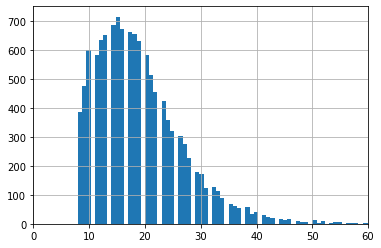

In [28]:
len_sentence_hist = data_filtered_2['Number of Words'].hist(bins=400)
len_sentence_hist.set_xlim((0,60))

In [29]:
data_filtered_2.to_csv('data_after_step_1.csv')